In [72]:
import glob
import cv2
import random
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [181]:
def loop_img_and_apply(func):
    dataset_path = Path('./datasets/tomato_raw/')
    
    mean_value = {}
    for dir_name in os.listdir(dataset_path):
        dir_path = dataset_path / dir_name
    
        value_per_class = {}
        saturation_per_class = {}
        for class_name in os.listdir(dir_path):
            class_name_path = dir_path / class_name
    
            img_value = []
            for img_name in os.listdir(class_name_path):
                img_path = class_name_path / img_name
                   
                img_value.append(func(str(img_path)))
    
            value_per_class[class_name] = value_per_class.get(class_name, img_value)
    
        mean_value[dir_name] = mean_value.get(dir_name, value_per_class)

    return mean_value

# Brightness and Saturation

In [249]:
def cal_mean_brightness(img_path):
    img = cv2.imread(img_path)

    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    h, s, v = cv2.split(img_hsv)
    
    average_brightness = np.average(v)
    
    return round(average_brightness, 2)

def cal_mean_saturation(img_path):
    img = cv2.imread(img_path)

    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    h, s, v = cv2.split(img_hsv)
    
    average_saturation = np.average(s)
    
    return round(average_saturation, 2)

In [183]:
mean_brightness = loop_img_and_apply(cal_mean_brightness)

In [186]:
mean_saturation = loop_img_and_apply(cal_mean_saturation)

<Axes: title={'center': 'Brightness'}>

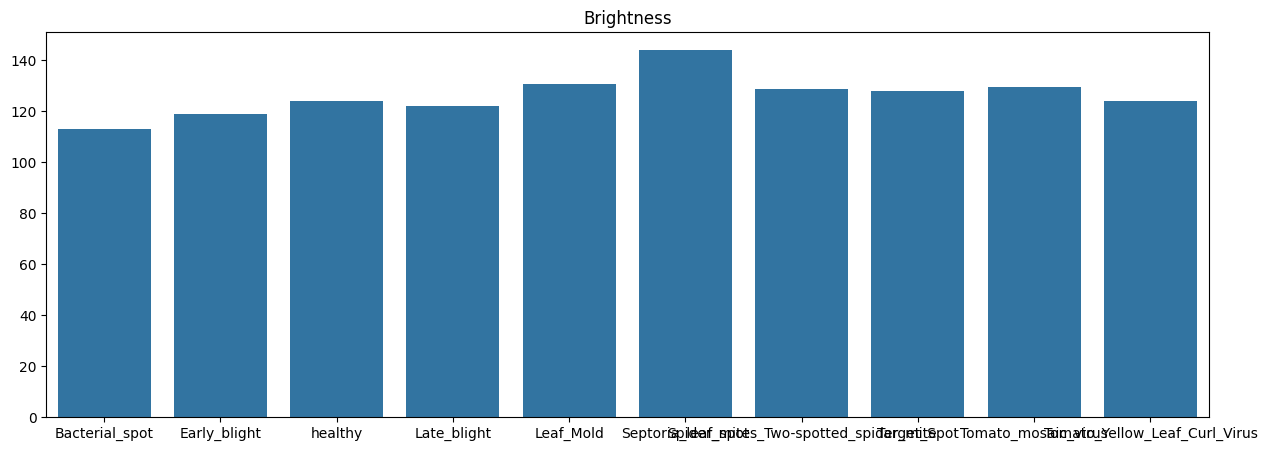

In [248]:
train_brightness_df = pd.DataFrame(mean_brightness['train'])

plt.figure(figsize=(15, 5))
plt.title('Brightness')
sns.barplot(train_brightness_df.mean())

<Axes: title={'center': 'Saturation'}>

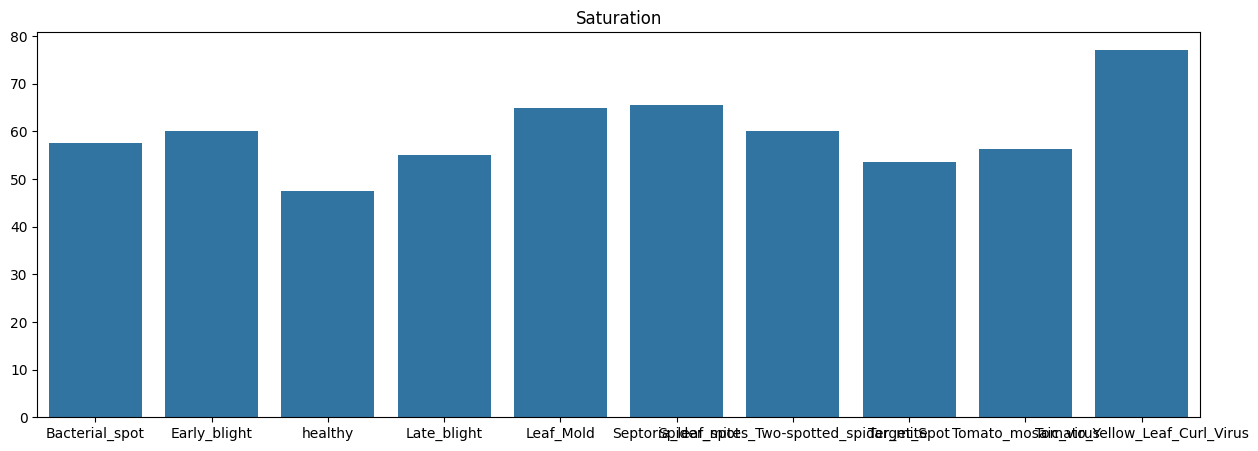

In [247]:
train_saturation_df = pd.DataFrame(mean_saturation['train'])

plt.figure(figsize=(15, 5))
plt.title('Saturation')
sns.barplot(train_saturation_df.mean())

In [310]:
dataset_path = Path('./datasets/tomato/')

dir_name = 'train'
dir_path = dataset_path / dir_name

imgs = []
for class_name in os.listdir(dir_path):
    class_name_path = dir_path / class_name

    for img_name in os.listdir(class_name_path):
        img_path = class_name_path / img_name
           
        img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
        imgs.append(img)

In [314]:
len(imgs)

8000

In [311]:
concatenated_img = np.concatenate(imgs)

In [327]:
a = cv2.meanStdDev(concatenated_img)

np.squeeze(np.round((a[0]/255), 4))

array([0.4522, 0.4627, 0.4181])

In [ ]:
(0.4522, 0.4627, 0.4181)

In [328]:
np.squeeze(np.round((a[1]/255), 4))

array([0.1883, 0.166 , 0.202 ])

In [ ]:
(0.1883, 0.166, 0.202)

In [272]:
concatenated_img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
cv2.meanStdDev(concatenated_img_hsv)

(array([[ 34.81115723],
        [ 72.52194214],
        [126.85359192]]),
 array([[24.37251304],
        [91.56319179],
        [27.60466041]]))

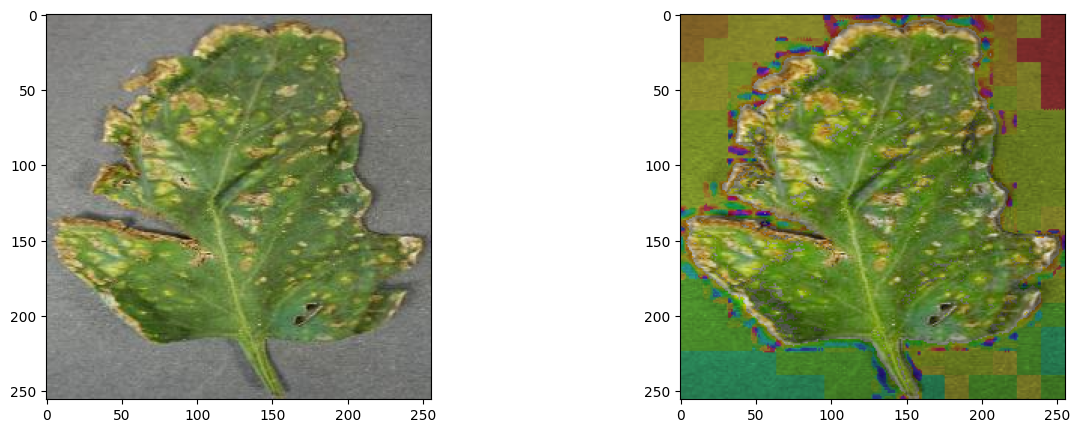

In [309]:
img = cv2.imread('./datasets/tomato_raw/train/Bacterial_spot/008538384871313753.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_img)

# s = (s - 72.52)/91.56
# v = (v - 126.85)/927.60

# v_eq = cv2.equalizeHist(v)
s_eq = s + (s - 91)
v_eq = v
# v_eq = v + (v - 126)
# v2_eq = cv2.equalizeHist(v2)

merged_img = cv2.merge([h, s_eq, v_eq])
merged_img = cv2.merge([h, s_eq, v_eq])

normal_img = cv2.cvtColor(merged_img, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(normal_img)

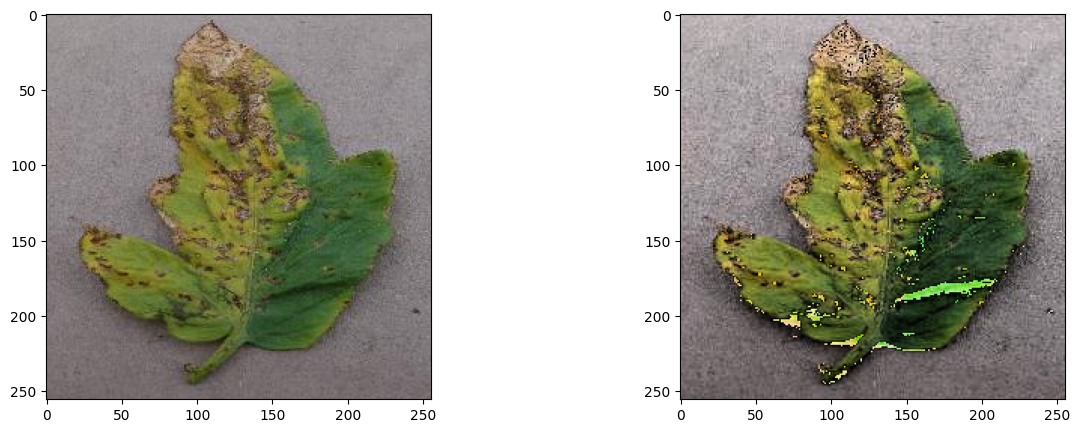

In [306]:
img = cv2.imread('./datasets/tomato_raw/train/Bacterial_spot/03563911649368223.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_img)

# s = (s - 72.52)/91.56
# v = (v - 126.85)/927.60

# v_eq = cv2.equalizeHist(v)
v_eq = v + (v - 126)
# v2_eq = cv2.equalizeHist(v2)

merged_img = cv2.merge([h, s, v_eq])

normal_img = cv2.cvtColor(merged_img, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(normal_img)

# Mean and Std of trainning img

In [240]:
def mean_cal(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.meanStdDev(img)[0]

def std_cal(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.meanStdDev(img)[1]
    
mean_color = loop_img_and_apply(mean_cal)
std_color = loop_img_and_apply(std_cal)

## Mean

In [270]:
mean_color_df = pd.DataFrame(mean_color['train'])

mean_color_imgs = []
for i in range(len(mean_color['train'])):
    mean_color_imgs.append(mean_color_df.iloc[:,i].mean())

np.mean(np.array(mean_color_imgs), axis=0)

array([[115.3341523 ],
       [118.04905751],
       [106.69838301]])

## Std

In [271]:
std_color_df = pd.DataFrame(std_color['train'])

std_color_imgs = []
for i in range(len(std_color['train'])):
    std_color_imgs.append(std_color_df.iloc[:,i].mean())

np.mean(np.array(std_color_imgs), axis=0)

array([[43.1252301 ],
       [37.6522681 ],
       [47.23421194]])

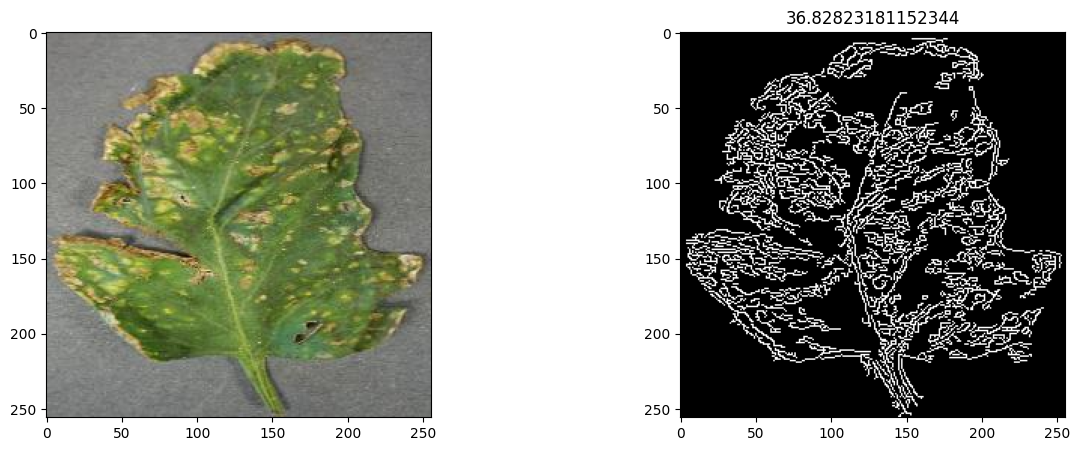

In [243]:
img = cv2.imread('./datasets/tomato_raw/train/Bacterial_spot/008538384871313753.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = cv2.GaussianBlur(img, (3, 3), 3)
img_canny = cv2.Canny(img , 50, 250)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.title(np.mean(img_canny))
plt.imshow(img_canny, cmap='gray')

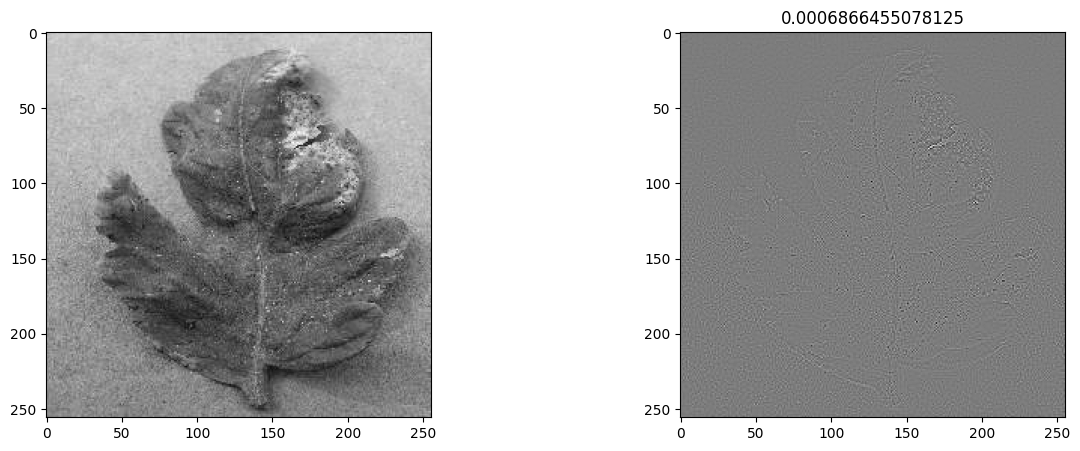

In [244]:
img = cv2.imread('./datasets/tomato_raw/train/Bacterial_spot/0213828677191773.JPG')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.title(np.mean(laplacian))
plt.imshow(laplacian, cmap='gray')

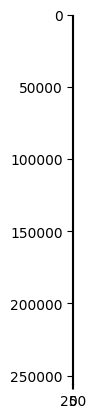

In [264]:
a=np.concatenate(([img]*1000))
plt.imshow(a)